# File and libraries

In [49]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_diff_input.csv'


file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [50]:
%run "scripts/dslabs_functions.py"


# Data functions

In [51]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [52]:
# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.7

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 426 entries, 2024-01-05 to 2025-03-05
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seven-day active users           426 non-null    float64
 1   28-day active users              426 non-null    float64
 2   Events per session               426 non-null    float64
 3   Item view events                 426 non-null    float64
 4   Add to baskets                   426 non-null    float64
 5   Checkouts                        426 non-null    float64
 6   E-commerce purchases             426 non-null    float64
 7   Average purchase revenue         426 non-null    float64
 8   Purchase revenue                 426 non-null    float64
 9   First time purchasers            426 non-null    float64
 10  Average session duration         426 non-null    float64
 11  ARPU                             426 non-null    float64
 12  ARP

# No Smoothing

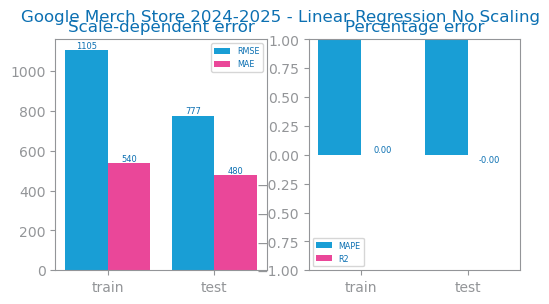

In [53]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)


# Ensure no data leakage
assert not set(train_0.index).intersection(set(test_0.index)), "Data leakage detected: Train and test sets overlap."


# Prepare the training and testing data from dataframes with features and target
# trnX_0 = train_0.drop(columns=[target])
# trnY_0 = train_0[target]
# tstX_0 = test_0.drop(columns=[target])
# tstY_0 = test_0[target]


# Prepare the training and testing data using the time index as the feature
trnX_0 = arange(len(train_0)).reshape(-1, 1)
trnY_0 = train_0[target].to_numpy()
tstX_0 = arange(len(train_0), len(data_0)).reshape(-1, 1)
tstY_0 = test_0[target].to_numpy()


# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_smoothing.png")

## no smoothing plot

<Axes: xlabel='Date', ylabel='Sessions'>

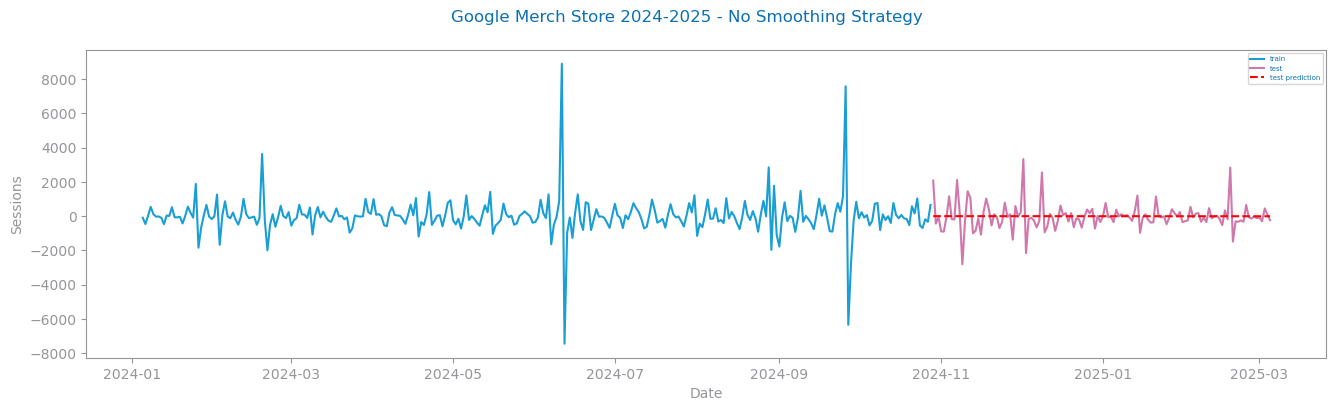

In [54]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Smoothing

## Smoothing strategy Application

In [55]:

def apply_strategy_1(df):

    data_copy=df.copy()
    

    # Split the data into train and test sets
    train, test = series_train_test_split(data_copy, trn_pct=test_split_threshold)
    

    WIN_SIZE = 10
    
    #smoothing over the training data
    train_smoothed=train.rolling(window=WIN_SIZE).mean().dropna()

    return train_smoothed, test



train_1,test_1=apply_strategy_1(data)

print(train_1.info())

print(test_1.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 2024-01-14 to 2024-10-28
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seven-day active users           289 non-null    float64
 1   28-day active users              289 non-null    float64
 2   Events per session               289 non-null    float64
 3   Item view events                 289 non-null    float64
 4   Add to baskets                   289 non-null    float64
 5   Checkouts                        289 non-null    float64
 6   E-commerce purchases             289 non-null    float64
 7   Average purchase revenue         289 non-null    float64
 8   Purchase revenue                 289 non-null    float64
 9   First time purchasers            289 non-null    float64
 10  Average session duration         289 non-null    float64
 11  ARPU                             289 non-null    float64
 12  ARP

## Smoothing Application evaluate

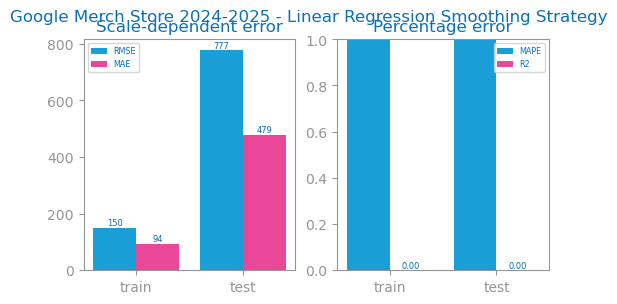

In [56]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets ------------------> ALREADY SPLIT IN THE STRATEGY FUNCTION
# train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)


# Prepare the training and testing data from dataframes with features and target
# trnX_1 = train_1.drop(columns=[target])
# trnY_1 = train_1[target]
# tstX_1 = test_1.drop(columns=[target])
# tstY_1 = test_1[target]


# Prepare the training and testing data using the time index as the feature
trnX_1 = arange(len(train_1)).reshape(-1, 1)
trnY_1 = train_1[target].to_numpy()
tstX_1 = arange(len(train_1), len(train_1+test_1)).reshape(-1, 1)
tstY_1 = test_1[target].to_numpy()


# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression Smoothing Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_smoothing.png")

## Smoothing Plot

<Axes: xlabel='Date', ylabel='Sessions'>

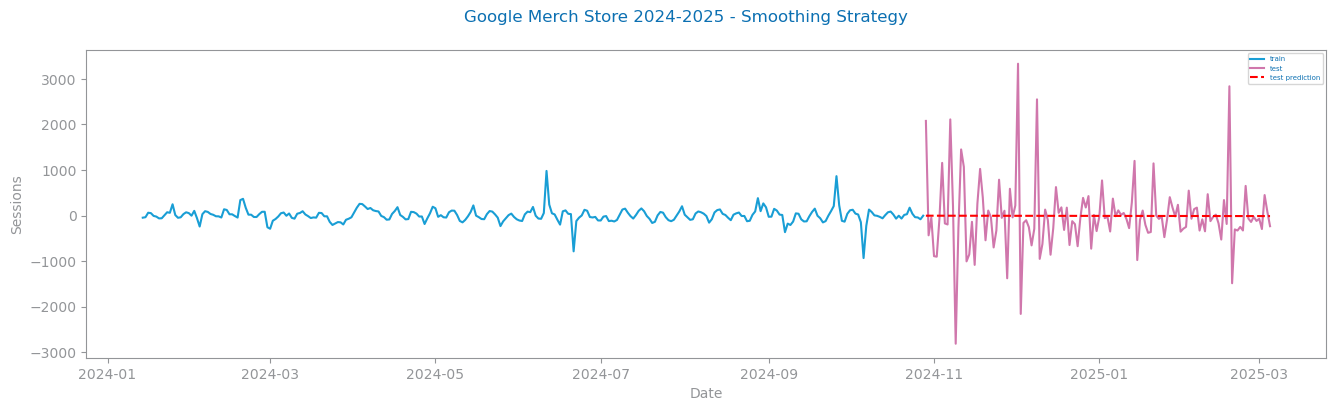

In [57]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Smoothing Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Smoothing", "Smoothing"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

          Model         MAE            MSE        RMSE        R²          MAPE
0  No Smoothing  479.667433  604032.153627  777.195055 -0.000012  4.861317e+10
1     Smoothing  478.923425  604012.796502  777.182602  0.000020  7.385213e+10


# save to csv

In [59]:
if test_data==False:
    

    data_save=data.copy()

    # if no smoothing was applied, the train and test data are the same
    # train_save, test_save = series_train_test_split(data_save, trn_pct=test_split_threshold)


    # apply smoothing strategy
    train_save,test_save=apply_strategy_1(data)

    train_save.reset_index(inplace=True)
    train_save.to_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", index=False)
    
    
    test_save.reset_index(inplace=True)
    test_save.to_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", index=False)
          

    print(train_save.columns)
    print(test_save.columns)

Index(['Date', 'Seven-day active users', '28-day active users',
       'Events per session', 'Item view events', 'Add to baskets', 'Checkouts',
       'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue',
       'First time purchasers', 'Average session duration', 'ARPU', 'ARPPU',
       'Views per user', 'Total users', 'Promotion views', 'Promotion clicks',
       'Sessions Mobile', 'Seven-day active users Mobile',
       '28-day active users Mobile', 'New users Mobile',
       'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile',
       'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessi